## 분류에 대한 선형 모델
Logistic, LinearSVC 두 개는 패키지가 다르다 = 알고리즘 종류가 다르다.

In [1]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


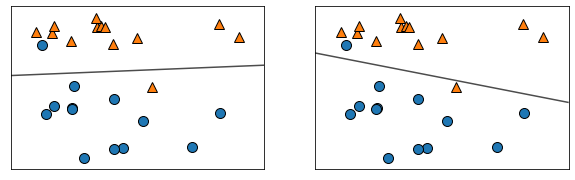

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes) : # 반복적으로 문제를 푸는 애들은 iteration을 줄 수 있다.
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

LinearSVC에 max_iter 값을 주지않으면 increase the number of iterations. 경고문이 뜬다. iteration 값을 증가시켜서 결과를 향상시킬 수 있다고 함.<br/>
파라메타를 지정해가면서 우리가 원하는 값에 근접해 가는 것을 hyper parameter 작업이라 한다.<br/>
보통 알고리즘을 선택하고 나면 hyper parameter 작업을 시작한다.

머신러닝 작업할 때,
1. preprocessing
2. algorithm 선택
3. Hypter parameter 작업

각 과정마다 시각화와 평가를 해보면서 각 단계를 나아간다.<br/>
최종적으로 최적화 되어있는 머신러닝 모델을 얻게 된다.

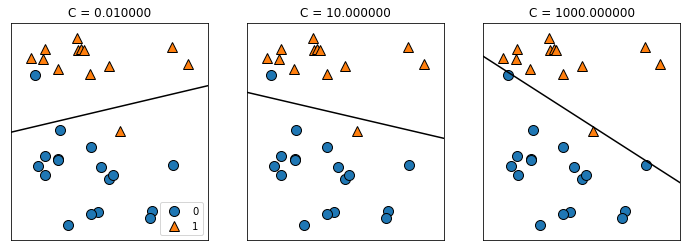

In [3]:
mglearn.plots.plot_linear_svc_regularization()
# regularization = 정규화

선을 보면 첫번째는 유연한데, 10정도 되니까 좀 더 타이트하게 라인에 맞추려 한다.<br/>
1000이 되면 약간 손해보더라도 칼같이 맞추려한다.<br/>
오류의 제약을 풀어줘서 루즈하게 가는 것이 새로운 데이터에 대한 적응력을 높이는 방법이 되기도 한다.

# 유방암 데이터

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
# 아무 제약을 걸지 않음

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.960093896713615
0.972027972027972


In [5]:
# max_iteration을 5000번, C의 값을 100으로 넣는다.
# C에 값을 넣지 않으면 default 값인 1이 들어간다.

logreg100 = LogisticRegression(max_iter=5000, C=100).fit(X_train, y_train)

print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9788732394366197
0.965034965034965


C는 오류에 대한 허용치이다.<br/>
C 값이 크면 클수록 알고리즘 내에서 오류를 허용하지 않겠다는 것이다. 좀 더 타이트하게 살펴보면서 원하는 값이 나올 때까지 반복하겠다는 것이다.<br/>
만약 C값이 1일 때와 100일 때 같았다면 어떤 의미인가? 제약 1 안에서 오류가 다 잡히고 있다는 뜻<br/>
유방암 데이터 자체가 잘 정제되어있다.<br/><br/>

max_iteration을 5000번이나 줬는데 결과가 빨리나온 이유?<br/>
임계치를 찾게되면 끝내버리기 때문에 5000번을 다 돌지 않아서 속도가 빠르게 보인다.<br/>
경고가 따로 뜨지 않는 것은 충분히 돌았다고 생각하기 때문이다.<br/>

In [6]:
logreg001 = LogisticRegression(max_iter=5000, C=0.01).fit(X_train, y_train)

print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9460093896713615
0.972027972027972


C 값을 타이트하게 줄 수록 오류를 허용하지 않는 다는 것이다.<br/>
오류를 허용한다는 이야기는 데이터 사이사이에 틈을 주는 것이다.<br/>
틈을 주는 이유? 데이터에 너무 최적화 시켜서 오류가 없으면 해당 데이터에만 과적합된다.<br/>
테스트 데이터로 테스트를 하면 오히려 테스트 정확도가 떨어지는 현상이 생긴다. (logreg100과 logreg001비교)

Classification 알고리즘 중에서는<br/>
둘 중 하나를 구별하는 알고리즘, 세개 이상을 사용하는 알고리즘이 있다.<br/>
알고리즘을 선택할 때 Categorical 데이터인지 묻는다.<br/>
Categorical data면 2개인지, 3개이상인지를 묻는다.<br/>
2개일 때, 3개 이상일 때 알고리즘을 구별해서 사용한다.

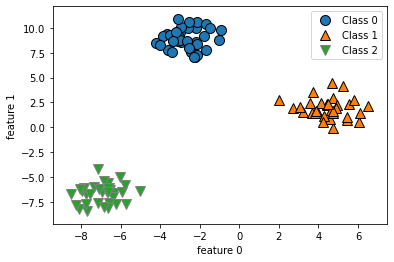

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.legend(['Class 0', 'Class 1', 'Class 2'])

blob은 storage 중에서도 blob storage가 있다.<br/>
텍스트, 바이너리, 파일 등 대부분 저장할 수 있다.<br/>
데이터가 얼룩얼룩하게 있는 것을 blob data라 한다.<br/><br/>

In [8]:
linear_svm = LinearSVC().fit(X, y)

선형회귀에서 a, b로 나뉘어지는 것은 y = wx + b 공식이 맞다.<br/>
그러나 지금처럼 a, b, c로 나뉘어지는 것은 y= w1x1 + w2x2 + w3x3 + b 공식이 된다.<br/>
linear 라인이 3개가 필요해서 wx도 3개가 필요하다.<br/>

In [9]:
print(linear_svm.coef_) # 기울기값을 나타낸다.
print(linear_svm.coef_.shape) # 3, 2
print(linear_svm.intercept_) # 절편

[[-0.17492745  0.23140894]
 [ 0.47621281 -0.06936761]
 [-0.18914313 -0.20399571]]
(3, 2)
[-1.07745013  0.13140422 -0.08604799]


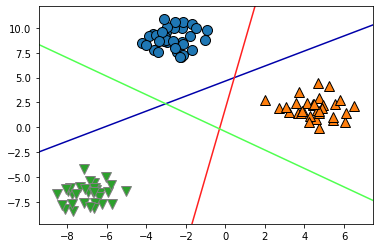

In [10]:
# 이 알고리즘을 이해하는 게 중요!
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

선이 세개 나왔고, plt.plot으로 그리게 되어있다.<br/>
color는 mglearn에 따라서 색이 나온다.<br/>
y = wx + b의 공식에서 x는 line, w는 coef[0], b는 intercept로 해당 공식을 표현하고 있다.<br/>

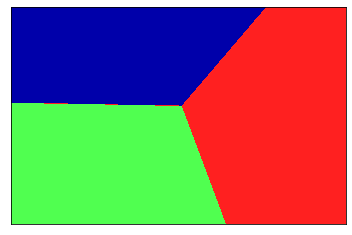

In [11]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True)

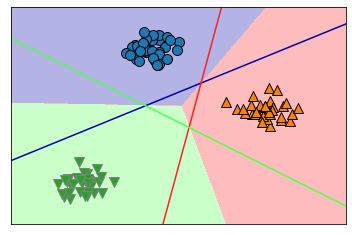

In [12]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15) # 길이

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

# Tree 계열 분류 알고리즘

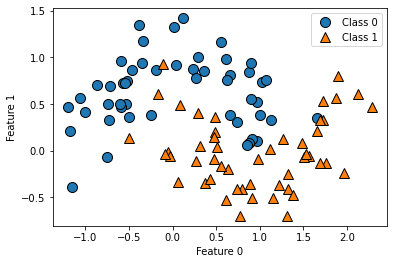

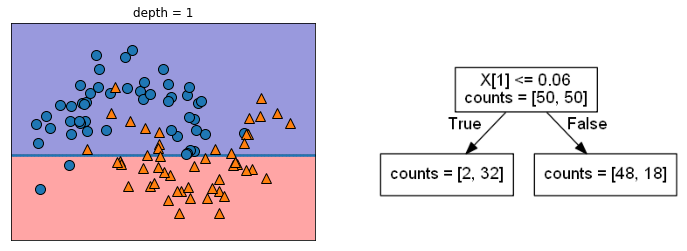

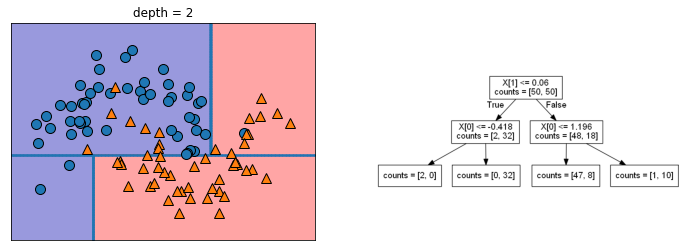

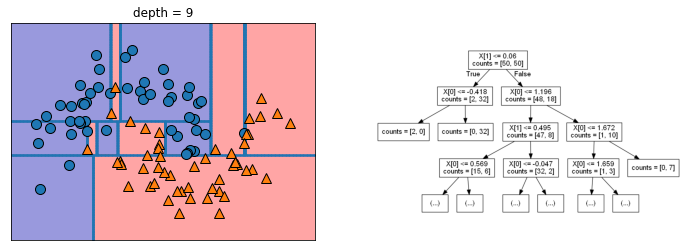

In [13]:
mglearn.plots.plot_tree_progressive()

tree는 depth를 나눌 때는 둘 중 하나가 된다.<br/>
depth가 내려갈 수록 세세하게 분류한다.<br/>
문제를 쪼개서 나가는 것을 Tree라고 한다.<br/>
어느 depth까지 내려갔을 때 일반화가 잘 되는 지 생각해야한다.<br/>

# 오후

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9300699300699301


DecisionTree를 사용했을 때 학습 정확도는 1.0이 나왔다.<br/>
test 정확도는 93%가 나왔다.<br/>
일정하지 않고 요철이 많으면 tree로 했을 때 생각보다 왕창 좋게 나온다.<br/><br/>
학습용 데이터와 테스트 데이터가 다른데도 이만큼 잘 나온건 학습을 잘 했다는 의미이다.

In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
# max_depth를 지정하는 이유? 데이터가 과도하게 적합되는 것을 막는 것이다.

tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))
# 학습 정확도는 낮아지는데, 테스트 정확도는 올라갈 수도 있다.
# 3단계에서 20단계까지 반복하면서 최적의 단계를 찾아간다.

0.9953051643192489
0.951048951048951


[Text(0.5657894736842105, 0.9, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]\nclass = B'),
 Text(0.34210526315789475, 0.7, 'worst radius <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]\nclass = B'),
 Text(0.21052631578947367, 0.5, 'radius error <= 0.626\ngini = 0.039\nsamples = 249\nvalue = [5, 244]\nclass = B'),
 Text(0.10526315789473684, 0.3, 'worst smoothness <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]\nclass = B'),
 Text(0.05263157894736842, 0.1, 'gini = 0.016\nsamples = 245\nvalue = [2, 243]\nclass = B'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = A'),
 Text(0.3157894736842105, 0.3, 'symmetry error <= 0.025\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = A'),
 Text(0.2631578947368421, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = A'),
 Text(0.3684210526315789, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.47368421052631576, 0.5, 'worst texture <= 19.91\ng

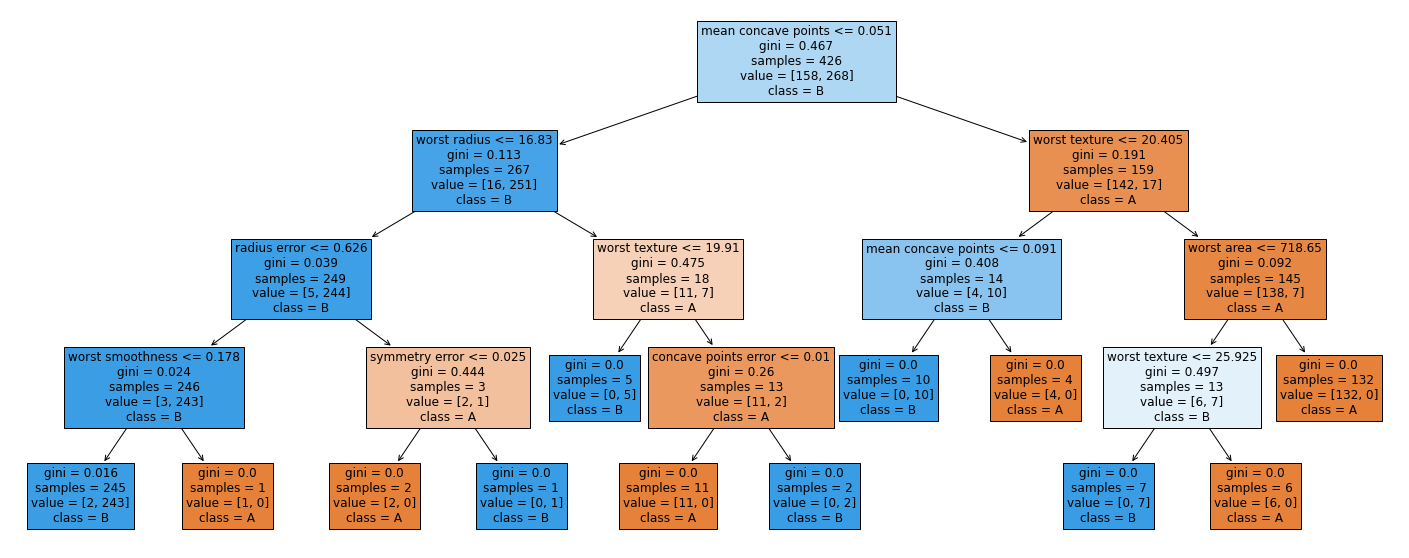

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plot_tree(tree, class_names=['A', 'B'], filled=True, fontsize=12, feature_names = cancer.feature_names)

In [18]:
# 트리의 중요도를 백분율로 확인할 수 있다.
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


Text(0, 0.5, 'Price')

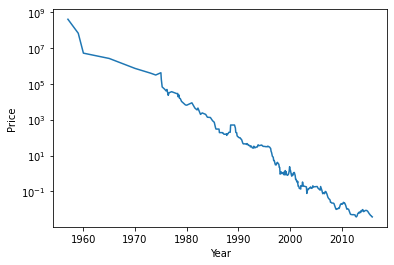

In [19]:
import os
ram_price = pd.read_csv('./data/ram_price.csv')

plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel('Year')
plt.ylabel('Price')

In [20]:
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [21]:
from sklearn.tree import DecisionTreeClassifier

data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

In [22]:
X_train = data_train.date.to_numpy()[:,np.newaxis]

In [23]:
y_train = np.log(data_train.price)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [25]:
X_all = ram_price.date.to_numpy()[:, np.newaxis]

In [26]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [27]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [28]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

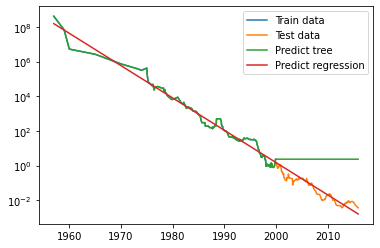

In [29]:
plt.semilogy(data_train.date, data_train.price, label='Train data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_price.date, price_tree, label='Predict tree')
plt.semilogy(ram_price.date, price_lr, label='Predict regression')
plt.legend()

In [30]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [32]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

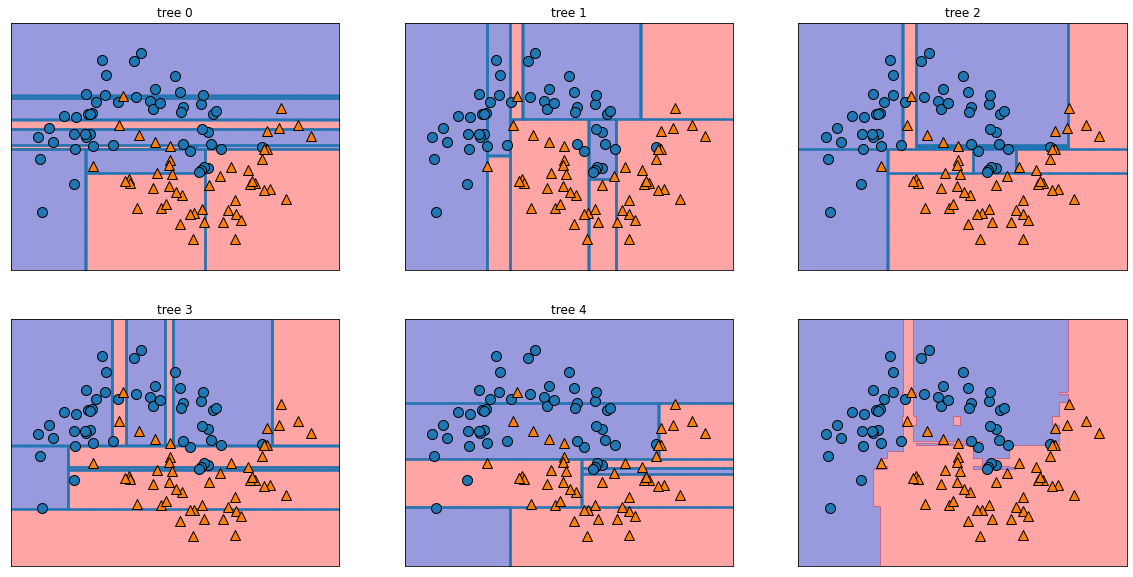

In [33]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title('tree {}'.format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1],
                                alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


In [36]:
# plot_feature_importances_cancer(forest)

# △▼

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [38]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [40]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

# depth를 깊게 안 내려가도 정확도가 높게 나온다.
# max_depth = 1 이면 한 단계에서 선택되는데, 적은 depth에서 정확도를 올리면 장점은 적은 메모리로 동작된다.
# 지금은 테스트를 위해 1단계만 진행했는데, 보통 gradientboosting은 4~5단계정도면 충분한데 5단계 정도에서도 학습이 과해지면 단계를 낮춰야 한다.

0.9906103286384976
0.972027972027972


In [41]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

# 학습정확도와 테스트정확도가 떨어졌다.
# learning_rate로 학습을 위해 얼마나 복잡한 모델을 만들지에 대한 복잡도를 제어할 수 있다.

0.9882629107981221
0.965034965034965


In [42]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

# learning_rate를 0.1로 줬다. learning_rate는 학습량에 자체에 대한 제어이고 max_depth는 세세하게 깊이에 대해 제어를 줄 수 있다.
# 높은 확률의 accuracy를 갖는 모델을 만드는 게 목표다.

# GradientBoosting은 learning_rate와 max_depth를 제어할 수 있는 게 가장 큰 장점이다.
# 보정하는 알고리즘이 있어서 depth를 작게 써도 원하는 결과를 빨리 낼 수 있다. 속도도 빠르고 메모리도 적게쓰는 장점이 있다.

1.0
0.965034965034965


In [43]:
X, y = make_blobs(centers=4, random_state=8)

In [44]:
X

array([[ -1.72161036,  -1.48033142],
       [ -3.6573384 ,  -9.5482383 ],
       [  7.0778163 ,   0.99508772],
       [ -1.36579859,  -0.3148625 ],
       [ -2.66521206,  -3.12591651],
       [  7.63027116,   8.69797933],
       [ -5.27144331, -12.11880698],
       [  7.91767139,   1.41547387],
       [ -1.41284184,   0.11296348],
       [ -1.01519039,  -1.03318203],
       [  8.2634157 ,  10.34723435],
       [  6.96767867,   8.9622523 ],
       [ -0.84779249,  -2.12185612],
       [  7.48006237,   2.49392925],
       [  7.71454967,   1.8420701 ],
       [ -7.74064658,  -8.61800744],
       [ -5.41087235,  -8.7194128 ],
       [ -2.27579204,  -2.89699926],
       [ -1.25668449,  -2.33416219],
       [  7.61227907,   9.4463627 ],
       [  8.81545663,   8.76386046],
       [  7.1895354 ,   0.43090048],
       [  7.40292703,   9.16217702],
       [  5.17209648,  11.78064756],
       [ -2.10476115,  -1.57846672],
       [  6.5342397 ,   9.45532341],
       [  7.59635095,   8.0197955 ],
 

In [45]:
y
# 0, 1, 2, 3 으로 총 4개의 집합이 나온다.

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

Text(0, 0.5, 'feature 1')

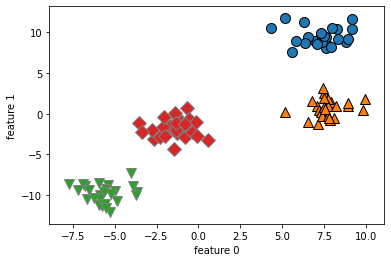

In [46]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# 지금은 4개의 그룹으로 나오는데 2개의 그룹으로 만들고 싶다.
# 어떻게 합치면 될까? 0, 2 짝수로 하나, 1, 3 홀수로 하나를 만든다.

Text(0, 0.5, 'feature 1')

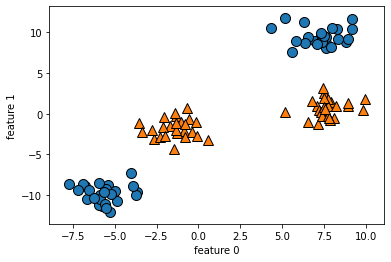

In [47]:
y = y % 2 # 그룹이 두개가 되었다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# 반복학습 04/15

RF에서 tree를 조절할 수 있다. 트리를 많이 쓸수록 일반화가 잘되고 정밀한 모델을 만들 수 있다.<br/>
트리는 forest.estimators_ 옵션으로 트리의 갯수를 조정할 수 있었다.<br/>